In [7]:
import os
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from strnet.models.STR_Net import STR_Net
from strnet.datasets.r3d_dataset import NumpyDataset, psnr, AverageMeter, to_tensor

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 定义数据转换
data_transforms = T.Compose([T.Lambda(to_tensor)])

# 加载数据
dataset = NumpyDataset('data/x_test.npy', 'data/y_test.npy', data_transforms, data_transforms)

dataloader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=0)
# 加载模型
model = STR_Net(in_channels=1, out_channels=1, embed_dim=36).to(device)
state_dict = torch.load('model/best.pt')

model.load_state_dict(state_dict)
model.eval()
# 开始预测
with torch.no_grad():
    for i, (data, label) in enumerate(dataloader):
        data = data.to(device)
        label = label.to(device)
        output = model(data)
        print(output.shape)
        print(label.shape)
        break
input_l = data.cpu().numpy().reshape(8, 25, 25, 49)
output_l = output.cpu().numpy().reshape(8, 25, 25, 49)
gt_l = label.cpu().numpy().reshape(8, 25, 25, 49)
print(output.shape)
# pltr = misc.Plotter()
# pltr.sceneshow(x=output[0],perspective='simulated').show()
n = 4
input = input_l[n]
output = output_l[n]
gt = gt_l[n]


torch.Size([8, 1, 25, 25, 49])
torch.Size([8, 1, 25, 25, 49])
torch.Size([8, 1, 25, 25, 49])


In [8]:
import torch
import torch.nn.functional as F
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

def computePSNR(estimate, original, max_val=1.0):
    estimate = np.squeeze(estimate)
    original = np.squeeze(original)
    psnr = compare_psnr(original, estimate, data_range=max_val)
    return psnr

def computeSSIM(estimate, original, max_val=1.0):
    estimate = np.squeeze(estimate)
    original = np.squeeze(original)
    ssim = compare_ssim(original, estimate, data_range=max_val, multichannel=True)
    return ssim


psnrs = computePSNR(output, gt)
ssims = computeSSIM(output, gt)

print('Average PSNR : {:.1f} dB, PSNR on the Sample Image: {:.2f} dB'.format(np.mean(psnrs), psnrs))
print('Average SSIM : {:.2f}, SSIM on the Sample Image: {:.4f}'.format(np.mean(ssims), ssims))

Average PSNR : 33.8 dB, PSNR on the Sample Image: 33.79 dB
Average SSIM : 0.95, SSIM on the Sample Image: 0.9532


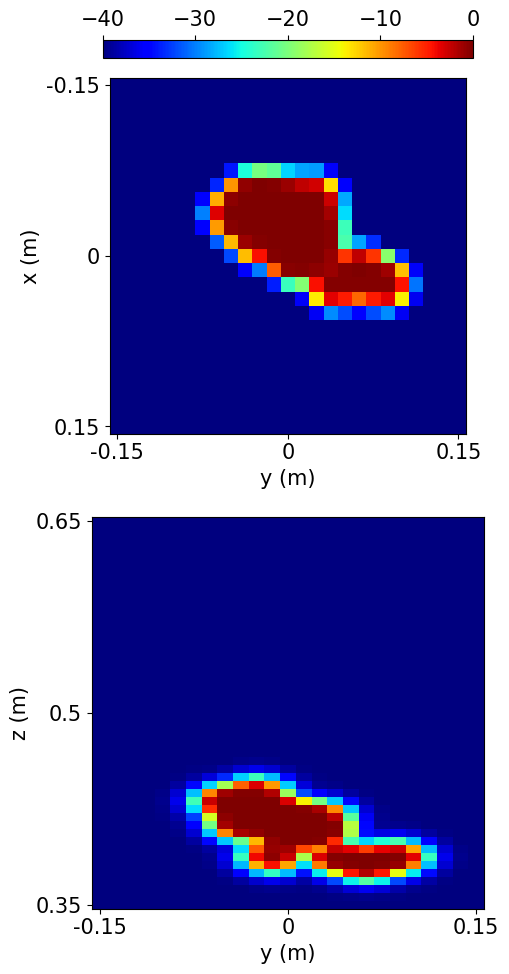

In [11]:
import strnet.utils.r3d_misc as misc
import numpy as np
import matplotlib.pyplot as plt
pltr = misc.Plotter()

pltr.sceneshow(x=input,perspective='simulated').show()
plt.figure(figsize=(5,10))
pltr.maxProjection(x=input)
